# Prediction of Heat in district heating system using different Deep Learning algorithms and checking their accuracy:

### General steps for designing the Deep Learning Models:
* Step - 1: Import Libraries.
* Step - 2: Upload the Dataset
* Step - 3: Pre-Processing of the Data
    * Step - 3a : Checking Details of the Data
    * Step - 3b : Checking Missing Values
    * Step - 3c : Checking Null Values
    * Step - 3d : Deleting space from the first column
    * Step - 3e : Checking Duplicate Values
    * Step - 3f : Dropping Duplicate Values
    * Step - 3g : Description of Data
    * Step - 3h : Converting 'Date/Time' to 'Timestamp'
* Step - 4: Data Visualization
    * Step - 4a : Graphs of all parameters
    * Step - 4b : Checking Correlation of the parameters
    * Step - 4c : Correlation Visualization
    * Step - 4d : Dropping less Correlated Values
* Step - 5: Train -Test splitting of the Data
    * Step - 5a : Split the dataset into features and targets 
    * Step - 5b : Normalizing the data
    * Step - 5c : Split into train and test Dataset
    * Step - 5d: Checking the shapes of Train and Test Datasets 
* Step - 6: Applying Deep Learning Models
    * Step - 6a : Change the shape of dataset if necessary
    * Step - 6b : Define the model Architecture
    * Step - 6c : Print the model ummary
    * Step - 6d : Compile the model
    * Step - 6e : Train the model
    * Step - 6f : Evaluate the model
    * Step - 6g : Denormalize the data
    * Step - 6h : Compute the Error
    * Step - 6i : Make Dataframe of Actual Targets and Predicted Targets
    * Step - 6j : Convert 'Timestamp' into 'Date/Time'
    * Step - 6k : Plot the Graph of Actual Targets v/s Predicted Targets


## Step 1: Importing necessary files for model prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout, Conv1D, MaxPooling1D, Flatten
from keras.regularizers import l2,l1
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

## Step 2: Upload dataset as csv file

In [7]:
#Importing the dataset as a csv file:
Data = pd.read_csv("C:/Users/Lenovo/Desktop/HeatAlgorithms/Machine Learning Algorithms/HeatDemand(1745).csv")

In [8]:
print(Data)

              Date/Time  Outdoor Temperature  Solar Radiation Rate per Area  \
0       01/01  00:15:00               7.2725                            0.0   
1       01/01  00:30:00               6.0650                            0.0   
2       01/01  00:45:00               4.8575                            0.0   
3       01/01  01:00:00               3.6500                            0.0   
4       01/01  01:15:00               3.8375                            0.0   
...                 ...                  ...                            ...   
70074   12/31  23:00:00               2.1400                            0.0   
70075   12/31  23:15:00               2.3300                            0.0   
70076   12/31  23:30:00               2.5200                            0.0   
70077   12/31  23:45:00               2.7100                            0.0   
70078   12/31  24:00:00               2.9000                            0.0   

       Direct Solar Radiation Rate per Area  Occupa

## Step 3:Pre - processing of the data:

In [9]:
# Checking the details of the data:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70079 entries, 0 to 70078
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Date/Time                                       70079 non-null  object 
 1   Outdoor Temperature                             70079 non-null  float64
 2   Solar Radiation Rate per Area                   70079 non-null  float64
 3   Direct Solar Radiation Rate per Area            70079 non-null  float64
 4   Occupant Count                                  70079 non-null  float64
 5   People Sensible Heating Rate                    70079 non-null  float64
 6   Windows Total Transmitted Solar Radiation Rate  70079 non-null  float64
 7   Hot Water Energy                                70079 non-null  float64
 8   Hot Water Rate                                  70079 non-null  float64
 9   Inlet Temperature                      

In [10]:
# Checking are there any missing values:
Data.isna().sum()

Date/Time                                         0
Outdoor Temperature                               0
Solar Radiation Rate per Area                     0
Direct Solar Radiation Rate per Area              0
Occupant Count                                    0
People Sensible Heating Rate                      0
Windows Total Transmitted Solar Radiation Rate    0
Hot Water Energy                                  0
Hot Water Rate                                    0
Inlet Temperature                                 0
class                                             0
dtype: int64

In [11]:
# Checking are there any null values:
Data.isnull().sum()

Date/Time                                         0
Outdoor Temperature                               0
Solar Radiation Rate per Area                     0
Direct Solar Radiation Rate per Area              0
Occupant Count                                    0
People Sensible Heating Rate                      0
Windows Total Transmitted Solar Radiation Rate    0
Hot Water Energy                                  0
Hot Water Rate                                    0
Inlet Temperature                                 0
class                                             0
dtype: int64

In [12]:
# Deleting any empty spaces from the first column:
Data['Date/Time'] = Data['Date/Time'].str.strip()

In [13]:
# Checking are there any duplicate values:
duplicates = Data.pivot_table(index = ['Date/Time', 'Outdoor Temperature', 
                                       'Solar Radiation Rate per Area', 
                                       'Direct Solar Radiation Rate per Area', 
                                       'Occupant Count', 
                                       'People Sensible Heating Rate',
                                       'Windows Total Transmitted Solar Radiation Rate',
                                       'Hot Water Energy', 
                                       'Hot Water Rate', 
                                       'Inlet Temperature' , 
                                       'class'], aggfunc = 'size' )
print(duplicates)

Date/Time        Outdoor Temperature  Solar Radiation Rate per Area  Direct Solar Radiation Rate per Area  Occupant Count  People Sensible Heating Rate  Windows Total Transmitted Solar Radiation Rate  Hot Water Energy  Hot Water Rate  Inlet Temperature  class
01/01  00:15:00  7.2725               0.0                            0.0                                   1.0             80.912482                     0.0                                             500406.3132       556.007015      50                 50       2
01/01  00:30:00  6.0650               0.0                            0.0                                   1.0             79.740535                     0.0                                             474024.5772       526.693975      52                 50       2
01/01  00:45:00  4.8575               0.0                            0.0                                   1.0             78.220023                     0.0                                             365448.87

In [14]:
# Removing duplicate values:
Data = Data.drop_duplicates()
Data

,Date/Time,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class
0,01/01 00:15:00,7.2725,0.0,0.0,1.0,80.912482,0.0,500406.3132,556.007015,50,50
1,01/01 00:30:00,6.0650,0.0,0.0,1.0,79.740535,0.0,474024.5772,526.693975,52,50
2,01/01 00:45:00,4.8575,0.0,0.0,1.0,78.220023,0.0,365448.8766,406.054307,56,50
3,01/01 01:00:00,3.6500,0.0,0.0,1.0,77.895519,0.0,276488.1718,307.209080,59,50
4,01/01 01:15:00,3.8375,0.0,0.0,1.0,77.618478,0.0,224995.4725,249.994969,61,61
...,...,...,...,...,...,...,...,...,...,...,...
35035,12/31 23:00:00,2.1400,0.0,0.0,1.0,76.923458,0.0,238868.6237,265.409582,61,61
35036,12/31 23:15:00,2.3300,0.0,0.0,1.0,77.053991,0.0,239238.6102,265.820678,61,61
35037,12/31 23:30:00,2.5200,0.0,0.0,1.0,77.006378,0.0,238473.8181,264.970909,61,61
35038,12/31 23:45:00,2.7100,0.0,0.0,1.0,76.806447,0.0,236891.7890,263.213099,61,61


In [18]:
# Last column name is different so making it inline:
Data = Data.rename(index={70078:35039})
Data

,Date/Time,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class
0,01/01 00:15:00,7.2725,0.0,0.0,1.0,80.912482,0.0,500406.3132,556.007015,50,50
1,01/01 00:30:00,6.0650,0.0,0.0,1.0,79.740535,0.0,474024.5772,526.693975,52,50
2,01/01 00:45:00,4.8575,0.0,0.0,1.0,78.220023,0.0,365448.8766,406.054307,56,50
3,01/01 01:00:00,3.6500,0.0,0.0,1.0,77.895519,0.0,276488.1718,307.209080,59,50
4,01/01 01:15:00,3.8375,0.0,0.0,1.0,77.618478,0.0,224995.4725,249.994969,61,61
...,...,...,...,...,...,...,...,...,...,...,...
35035,12/31 23:00:00,2.1400,0.0,0.0,1.0,76.923458,0.0,238868.6237,265.409582,61,61
35036,12/31 23:15:00,2.3300,0.0,0.0,1.0,77.053991,0.0,239238.6102,265.820678,61,61
35037,12/31 23:30:00,2.5200,0.0,0.0,1.0,77.006378,0.0,238473.8181,264.970909,61,61
35038,12/31 23:45:00,2.7100,0.0,0.0,1.0,76.806447,0.0,236891.7890,263.213099,61,61


In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Date/Time                                       35040 non-null  object 
 1   Outdoor Temperature                             35040 non-null  float64
 2   Solar Radiation Rate per Area                   35040 non-null  float64
 3   Direct Solar Radiation Rate per Area            35040 non-null  float64
 4   Occupant Count                                  35040 non-null  float64
 5   People Sensible Heating Rate                    35040 non-null  float64
 6   Windows Total Transmitted Solar Radiation Rate  35040 non-null  float64
 7   Hot Water Energy                                35040 non-null  float64
 8   Hot Water Rate                                  35040 non-null  float64
 9   Inlet Temperature                      

In [20]:
# Description of data:
Data.describe()

,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,9.778301,63.357807,97.279060,0.763271,57.325211,166.530989,117700.933834,130.778815,65.390325,65.292180
std,5.934779,94.357632,202.503056,0.312582,23.926332,292.197910,74412.773591,82.680860,2.873735,3.225421
min,-4.230000,0.000000,0.000000,0.000000,0.000000,0.000000,15945.175030,17.716861,50.000000,50.000000
25%,5.410000,0.000000,0.000000,0.500000,38.504211,0.000000,40190.017363,44.655575,63.000000,63.000000
50%,9.320000,0.000000,0.000000,1.000000,71.897686,0.000000,118932.918500,132.147687,65.000000,65.000000
75%,13.940000,104.000000,61.310000,1.000000,77.013944,215.069063,177189.416000,196.877129,68.000000,68.000000
max,26.630000,440.000000,973.610000,1.000000,83.309758,1794.118158,500406.313200,556.007015,69.000000,69.000000


In [21]:
# Splitting 'Date/Time' column just for convert it in Timestamp:
for i in range(len(Data['Date/Time'])):
    month_day, hour_mins_secs = Data['Date/Time'][i].split(' ',1)
    month, day = month_day.split('/')
    hour,mins,secs = hour_mins_secs.split(':')
    hour = hour.lstrip()
    if hour == '24':
        Data['Date/Time'][i] = f'{month}/{day} 00:{mins}:{secs}'

In [22]:
# convert the date/time column to a timestamp:
Data['Timestamp'] = pd.to_datetime(Data['Date/Time'], format='%m/%d %H:%M:%S')
Data['Timestamp']

0       1900-01-01 00:15:00
1       1900-01-01 00:30:00
2       1900-01-01 00:45:00
3       1900-01-01 01:00:00
4       1900-01-01 01:15:00
                ...        
35035   1900-12-31 23:00:00
35036   1900-12-31 23:15:00
35037   1900-12-31 23:30:00
35038   1900-12-31 23:45:00
35039   1900-12-31 00:00:00
Name: Timestamp, Length: 35040, dtype: datetime64[ns]

In [23]:
Data['Timestamp'] = (Data['Timestamp'] - pd.Timestamp("1900-01-01")) // pd.Timedelta('1m')
Data['Timestamp']

0            15
1            30
2            45
3            60
4            75
          ...  
35035    525540
35036    525555
35037    525570
35038    525585
35039    524160
Name: Timestamp, Length: 35040, dtype: int64

In [25]:
for i in range(96,len(Data['Timestamp'])+1,96):
    Data['Timestamp'][i-1] = Data['Timestamp'][i-2] + 15

Data['Timestamp']

0            15
1            30
2            45
3            60
4            75
          ...  
35035    525540
35036    525555
35037    525570
35038    525585
35039    525600
Name: Timestamp, Length: 35040, dtype: int64

In [26]:
# After adding Timestamp checking the data:
Data

,Date/Time,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class,Timestamp
0,01/01 00:15:00,7.2725,0.0,0.0,1.0,80.912482,0.0,500406.3132,556.007015,50,50,15
1,01/01 00:30:00,6.0650,0.0,0.0,1.0,79.740535,0.0,474024.5772,526.693975,52,50,30
2,01/01 00:45:00,4.8575,0.0,0.0,1.0,78.220023,0.0,365448.8766,406.054307,56,50,45
3,01/01 01:00:00,3.6500,0.0,0.0,1.0,77.895519,0.0,276488.1718,307.209080,59,50,60
4,01/01 01:15:00,3.8375,0.0,0.0,1.0,77.618478,0.0,224995.4725,249.994969,61,61,75
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,12/31 23:00:00,2.1400,0.0,0.0,1.0,76.923458,0.0,238868.6237,265.409582,61,61,525540
35036,12/31 23:15:00,2.3300,0.0,0.0,1.0,77.053991,0.0,239238.6102,265.820678,61,61,525555
35037,12/31 23:30:00,2.5200,0.0,0.0,1.0,77.006378,0.0,238473.8181,264.970909,61,61,525570
35038,12/31 23:45:00,2.7100,0.0,0.0,1.0,76.806447,0.0,236891.7890,263.213099,61,61,525585



## Step 4: Data Visualization:

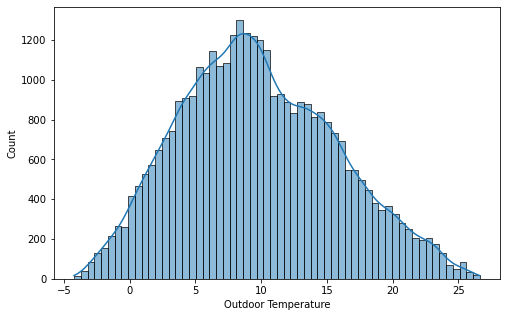

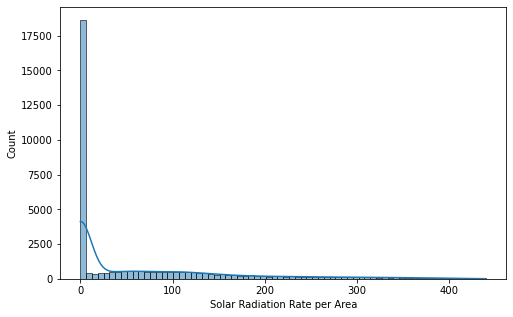

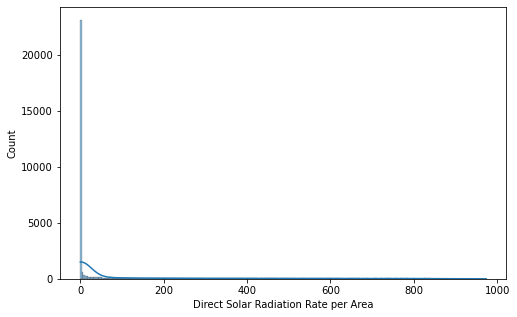

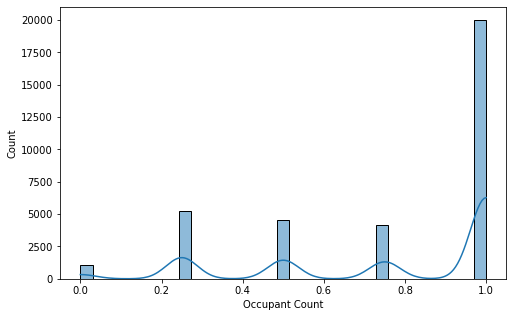

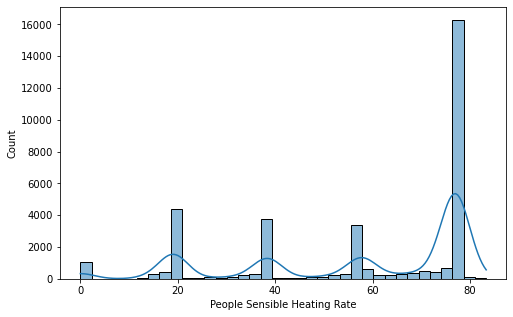

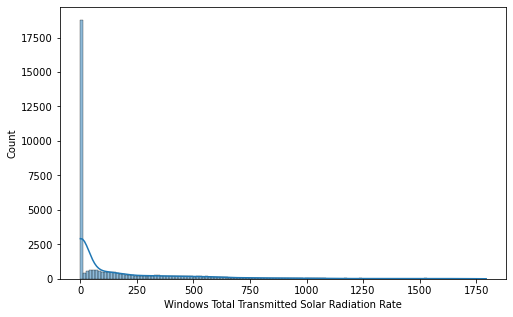

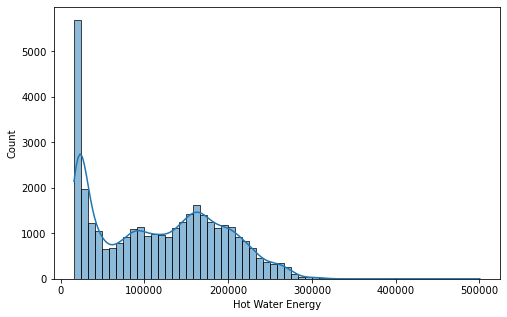

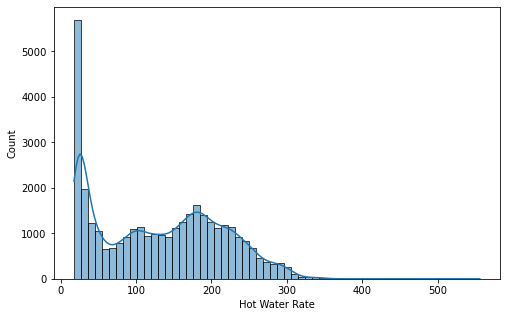

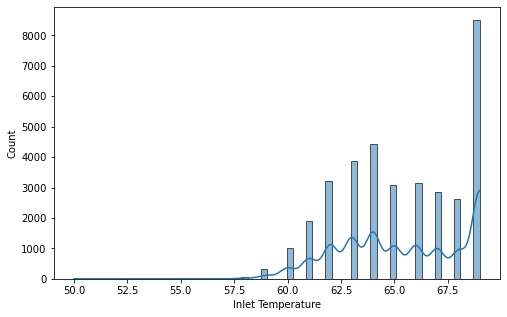

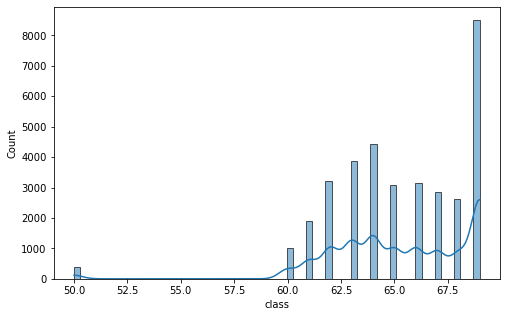

In [29]:
# For visualization of the data dropping the 'Date/Time' and 'Timestamp':
data = Data.drop(['Date/Time','Timestamp'],axis = 1)
for i in data.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data= data[i], kde= True, multiple='stack')
    plt.show()

In [30]:
#Checking the correlation between the parameters:
data.corr()

,Outdoor Temperature,Solar Radiation Rate per Area,Direct Solar Radiation Rate per Area,Occupant Count,People Sensible Heating Rate,Windows Total Transmitted Solar Radiation Rate,Hot Water Energy,Hot Water Rate,Inlet Temperature,class
Outdoor Temperature,1.000000,0.487246,0.373764,-0.175030,-0.269283,0.436475,-0.915209,-0.915209,0.907640,0.863669
Solar Radiation Rate per Area,0.487246,1.000000,0.443934,-0.379829,-0.395029,0.653559,-0.371611,-0.371611,0.368939,0.342350
Direct Solar Radiation Rate per Area,0.373764,0.443934,1.000000,-0.265090,-0.291969,0.776676,-0.304539,-0.304539,0.300052,0.279326
Occupant Count,-0.175030,-0.379829,-0.265090,1.000000,0.983613,-0.338237,0.040691,0.040691,-0.039730,-0.038324
People Sensible Heating Rate,-0.269283,-0.395029,-0.291969,0.983613,1.000000,-0.362328,0.125016,0.125016,-0.120708,-0.114648
Windows Total Transmitted Solar Radiation Rate,0.436475,0.653559,0.776676,-0.338237,-0.362328,1.000000,-0.361627,-0.361627,0.357880,0.331394
Hot Water Energy,-0.915209,-0.371611,-0.304539,0.040691,0.125016,-0.361627,1.000000,1.000000,-0.995522,-0.953917
Hot Water Rate,-0.915209,-0.371611,-0.304539,0.040691,0.125016,-0.361627,1.000000,1.000000,-0.995522,-0.953917
Inlet Temperature,0.907640,0.368939,0.300052,-0.039730,-0.120708,0.357880,-0.995522,-0.995522,1.000000,0.960453
class,0.863669,0.342350,0.279326,-0.038324,-0.114648,0.331394,-0.953917,-0.953917,0.960453,1.000000


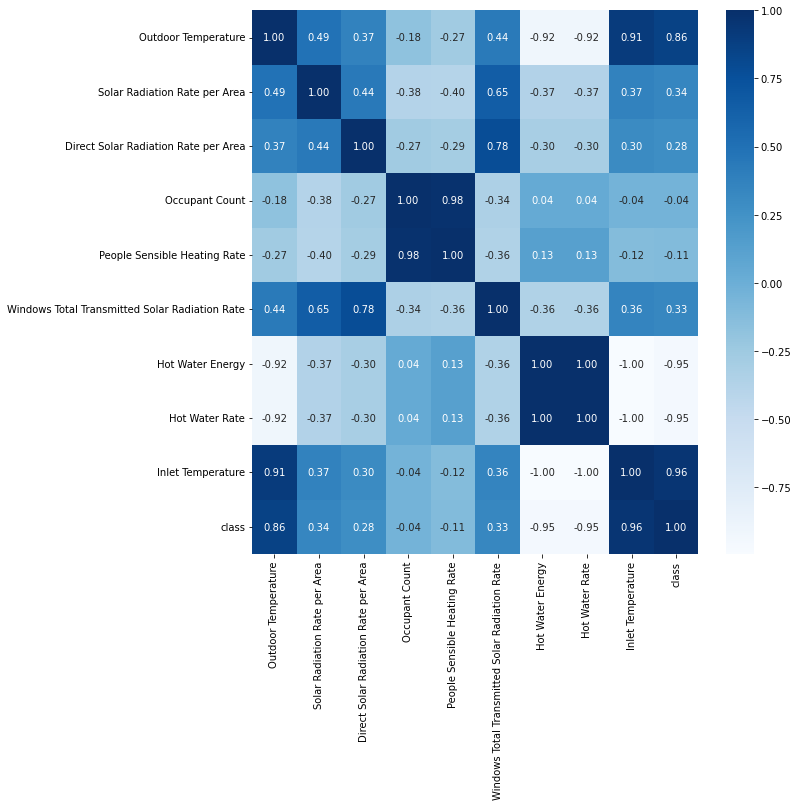

In [31]:
# Visualization of correlation of the data:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, fmt = '.2f',cmap = 'Blues')
plt.show()

### From the heatmap chart it is clearly seen that for predicting the Hot Water Energy, Hot Water Rate and Inlet Temperature the features Occupant count, People Sensible Heating Rate, Solar radiation Rate Per Area, Direct Solar Radiation Rate per Area and Windows Total Transmitted Solar Radiation Rate are not correlated. So, even if we do not consider these features then it will not affect in prediction of the target values.

In [32]:
#Dropping the less correlated values:
Data = Data.drop(['Solar Radiation Rate per Area', 
                  'Direct Solar Radiation Rate per Area',
                  'Occupant Count',
                  'People Sensible Heating Rate',
                  'Windows Total Transmitted Solar Radiation Rate'], axis = 1)

In [33]:
Data

,Date/Time,Outdoor Temperature,Hot Water Energy,Hot Water Rate,Inlet Temperature,class,Timestamp
0,01/01 00:15:00,7.2725,500406.3132,556.007015,50,50,15
1,01/01 00:30:00,6.0650,474024.5772,526.693975,52,50,30
2,01/01 00:45:00,4.8575,365448.8766,406.054307,56,50,45
3,01/01 01:00:00,3.6500,276488.1718,307.209080,59,50,60
4,01/01 01:15:00,3.8375,224995.4725,249.994969,61,61,75
...,...,...,...,...,...,...,...
35035,12/31 23:00:00,2.1400,238868.6237,265.409582,61,61,525540
35036,12/31 23:15:00,2.3300,239238.6102,265.820678,61,61,525555
35037,12/31 23:30:00,2.5200,238473.8181,264.970909,61,61,525570
35038,12/31 23:45:00,2.7100,236891.7890,263.213099,61,61,525585


## Step 5: Train Test Splitting of the data

In [34]:
# Split the dataset into features and targets:
X = Data[['Date/Time','Timestamp','Outdoor Temperature','class']]
Y = Data[['Hot Water Energy','Hot Water Rate','Inlet Temperature']]

In [35]:
# Normalize the data for predicting the model:
from sklearn.preprocessing import StandardScaler
SX = StandardScaler()
SY = StandardScaler()
XScaled = SX.fit_transform(X.drop(['Date/Time'],axis = 1))
YScaled = SY.fit_transform(Y)
print("XScaled = ",XScaled)
print("YScaled = ",YScaled)

XScaled =  [[-1.73200138 -0.42222909 -4.74121005]
 [-1.73190252 -0.62569366 -4.74121005]
 [-1.73180365 -0.82915823 -4.74121005]
 ...
 [ 1.73180365 -1.22302857 -1.3307539 ]
 [ 1.73190252 -1.19101344 -1.3307539 ]
 [ 1.73200138 -1.15899832 -1.3307539 ]]
YScaled =  [[ 5.1430799   5.1430799  -5.35558861]
 [ 4.78854249  4.78854249 -4.6596204 ]
 [ 3.32942136  3.32942136 -3.26768397]
 ...
 [ 1.62303596  1.62303596 -1.52776344]
 [ 1.60177548  1.60177548 -1.52776344]
 [ 1.60717018  1.60717018 -1.52776344]]


In [36]:
X_new_reshape = pd.concat([pd.DataFrame(np.array(X['Date/Time']),columns = ['Date/Time']),
                           pd.DataFrame(np.array(XScaled[:,0]),columns = ['Timestamp']),
                           pd.DataFrame(np.array(XScaled[:,1]),columns = ['Outdoor Temperature']),
                           pd.DataFrame(np.array(XScaled[:,2]),columns = ['class'])],axis = 1)
X_new_reshape

,Date/Time,Timestamp,Outdoor Temperature,class
0,01/01 00:15:00,-1.732001,-0.422229,-4.741210
1,01/01 00:30:00,-1.731903,-0.625694,-4.741210
2,01/01 00:45:00,-1.731804,-0.829158,-4.741210
3,01/01 01:00:00,-1.731705,-1.032623,-4.741210
4,01/01 01:15:00,-1.731606,-1.001029,-1.330754
...,...,...,...,...
35035,12/31 23:00:00,1.731606,-1.287059,-1.330754
35036,12/31 23:15:00,1.731705,-1.255044,-1.330754
35037,12/31 23:30:00,1.731804,-1.223029,-1.330754
35038,12/31 23:45:00,1.731903,-1.191013,-1.330754


In [37]:
Y_new_reshape = pd.concat([pd.DataFrame(np.array(YScaled[:,0]),columns = ['Hot Water Energy']),
                           pd.DataFrame(np.array(YScaled[:,1]),columns = ['Hot Water Rate']),
                           pd.DataFrame(np.array(YScaled[:,2]),columns = ['Inlet Temperature'])],axis = 1)
Y_new_reshape

,Hot Water Energy,Hot Water Rate,Inlet Temperature
0,5.143080,5.143080,-5.355589
1,4.788542,4.788542,-4.659620
2,3.329421,3.329421,-3.267684
3,2.133901,2.133901,-2.223732
4,1.441904,1.441904,-1.527763
...,...,...,...
35035,1.628342,1.628342,-1.527763
35036,1.633314,1.633314,-1.527763
35037,1.623036,1.623036,-1.527763
35038,1.601775,1.601775,-1.527763


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new_reshape, Y_new_reshape ,test_size = 0.3, random_state = 0)

In [39]:
X_train_new = X_train.drop(['Date/Time'],axis = 1)
X_train_new

,Timestamp,Outdoor Temperature,class
679,-1.664875,-0.483311,-0.400629
18784,0.125010,1.981433,1.149578
24093,0.649865,-0.120192,1.149578
19057,0.151999,2.634794,1.149578
15253,-0.224069,0.404688,0.529495
...,...,...,...
20757,0.320064,0.703777,1.149578
32103,1.441744,-1.007348,-1.330754
30403,1.273680,-0.722582,-0.400629
21243,0.368110,1.393787,1.149578


In [40]:
X_test_new = X_test.drop(['Date/Time'],axis = 1)
X_test_new

,Timestamp,Outdoor Temperature,class
5063,-1.231466,-0.872547,-0.710671
35039,1.732001,-1.158998,-1.330754
22416,0.484075,1.720678,1.149578
13063,-0.440576,-1.170793,-0.710671
32985,1.528940,-1.142148,-1.330754
...,...,...,...
18952,0.141619,2.374461,1.149578
34881,1.716381,-1.833844,-4.741210
11455,-0.599545,-0.089019,-0.710671
13266,-0.420507,-0.065008,0.219453


In [41]:
Y_train

,Hot Water Energy,Hot Water Rate,Inlet Temperature
679,0.662668,0.662668,-0.483811
18784,-1.340372,-1.340372,1.256109
24093,-1.249842,-1.249842,1.256109
19057,-1.332670,-1.332670,1.256109
15253,-0.426952,-0.426952,0.560141
...,...,...,...
20757,-1.121100,-1.121100,1.256109
32103,1.554467,1.554467,-1.527763
30403,0.457142,0.457142,-0.483811
21243,-1.173935,-1.173935,1.256109


In [42]:
Y_test

,Hot Water Energy,Hot Water Rate,Inlet Temperature
5063,0.884649,0.884649,-0.831795
35039,1.607170,1.607170,-1.527763
22416,-1.317254,-1.317254,1.256109
13063,0.724946,0.724946,-0.831795
32985,1.481972,1.481972,-1.527763
...,...,...,...
18952,-1.351041,-1.351041,1.256109
34881,2.122782,2.122782,-2.223732
11455,0.774690,0.774690,-0.831795
13266,-0.053705,-0.053705,0.212157


In [43]:
np.shape(X_train_new), np.shape(X_test_new), np.shape(Y_train), np.shape(Y_test)

((24528, 3), (10512, 3), (24528, 3), (10512, 3))

## Step 6: Applying Models

## Model 1: Convolutional Neural Network (CNN) 2D

In [44]:
# Reshape the input data to a 4D tensor to work with Conv2D layers:
X_train_cnn2d = X_train_new.values.reshape(X_train_new.shape[0], 1, X_train_new.shape[1], 1)
X_test_cnn2d = X_test_new.values.reshape(X_test_new.shape[0], 1, X_test_new.shape[1], 1)

In [45]:
np.shape(X_train_cnn2d), np.shape(X_test_cnn2d)

((24528, 1, 3, 1), (10512, 1, 3, 1))

In [46]:
# Define the model architecture:
cnn_model = Sequential()
    
cnn_model.add(Conv2D(filters=96, kernel_size=(1, 3), activation='linear', padding = 'same',input_shape=(X_train_cnn2d.shape[1], X_train_cnn2d.shape[2], 1), kernel_regularizer=l2(0.01)))
cnn_model.add(MaxPooling2D(pool_size=(1, 3),padding = 'same'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv2D(filters=64, kernel_size=(1, 3), activation='linear',padding = 'same',kernel_regularizer=l2(0.01)))
cnn_model.add(MaxPooling2D(pool_size=(1, 3),padding = 'same'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv2D(filters=32, kernel_size=(1, 3), activation='linear',padding = 'same',kernel_regularizer=l2(0.01)))
    
cnn_model.add(Flatten())
cnn_model.add(Dense(units=100, activation='linear'))
cnn_model.add(Dense(units=70, activation='linear'))
cnn_model.add(Dense(units=50, activation='linear'))
cnn_model.add(Dense(units=30, activation='linear'))
cnn_model.add(Dense(units=3))

In [171]:
# print the model summary:
print(cnn_model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 1, 3, 96)          384       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 96)         0         
 2D)                                                             
                                                                 
 dropout_32 (Dropout)        (None, 1, 1, 96)          0         
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 1, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 dropout_33 (Dropout)        (None, 1, 1, 64)        

In [47]:
# Compile the model:
cnn_model.compile(loss='mse', optimizer='adam' , metrics = ['accuracy'])

In [48]:
# Train the model:
history = cnn_model.fit(X_train_cnn2d, Y_train, epochs=100, batch_size=150, validation_split = 0.2 , verbose=1)

Epoch 1/100
131/131 [==============================] - 6s 15ms/step - loss: 0.6542 - accuracy: 0.7079 - val_loss: 0.2261 - val_accuracy: 0.4784
Epoch 2/100
131/131 [==============================] - 1s 11ms/step - loss: 0.1989 - accuracy: 0.7139 - val_loss: 0.1133 - val_accuracy: 0.5652
Epoch 3/100
131/131 [==============================] - 1s 10ms/step - loss: 0.1270 - accuracy: 0.7152 - val_loss: 0.0765 - val_accuracy: 0.4855
Epoch 4/100
131/131 [==============================] - 1s 11ms/step - loss: 0.1001 - accuracy: 0.7221 - val_loss: 0.0553 - val_accuracy: 0.4839
Epoch 5/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0898 - accuracy: 0.7309 - val_loss: 0.0489 - val_accuracy: 0.4804
Epoch 6/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0853 - accuracy: 0.7275 - val_loss: 0.0539 - val_accuracy: 0.9556
Epoch 7/100
131/131 [==============================] - 1s 11ms/step - loss: 0.0832 - accuracy: 0.7321 - val_loss: 0.0419 - val_accuracy:

131/131 [==============================] - 1s 10ms/step - loss: 0.0750 - accuracy: 0.7202 - val_loss: 0.0536 - val_accuracy: 0.4857
Epoch 58/100
131/131 [==============================] - 1s 10ms/step - loss: 0.0747 - accuracy: 0.7149 - val_loss: 0.0421 - val_accuracy: 0.9704
Epoch 59/100
131/131 [==============================] - 1s 10ms/step - loss: 0.0793 - accuracy: 0.7132 - val_loss: 0.0417 - val_accuracy: 0.4839
Epoch 60/100
131/131 [==============================] - 1s 10ms/step - loss: 0.0752 - accuracy: 0.7257 - val_loss: 0.0395 - val_accuracy: 0.9446
Epoch 61/100
131/131 [==============================] - 1s 10ms/step - loss: 0.0759 - accuracy: 0.7118 - val_loss: 0.0358 - val_accuracy: 0.9706
Epoch 62/100
131/131 [==============================] - 1s 10ms/step - loss: 0.0766 - accuracy: 0.7060 - val_loss: 0.0400 - val_accuracy: 0.6612
Epoch 63/100
131/131 [==============================] - 1s 10ms/step - loss: 0.0738 - accuracy: 0.7187 - val_loss: 0.0464 - val_accuracy: 0.706

In [49]:
# Evaluate the model:
accuracy = cnn_model.evaluate(X_test_cnn2d, Y_test)
print('Accuracy :', accuracy)

329/329 [==============================] - 1s 3ms/step - loss: 0.0480 - accuracy: 0.7927
Accuracy : [0.048042695969343185, 0.7927131056785583]


In [52]:
Y_Pred1 = cnn_model.predict(X_test_cnn2d)
Y_Pred1

329/329 [==============================] - 1s 3ms/step


array([[ 0.98848045,  0.9883076 , -0.98829764],
       [ 1.4487195 ,  1.4492785 , -1.4512837 ],
       [-1.5384004 , -1.5425619 ,  1.5534338 ],
       ...,
       [ 0.48663643,  0.48567018, -0.48349395],
       [-0.16465418, -0.1666493 ,  0.17163111],
       [ 1.7625659 ,  1.7636153 , -1.7669398 ]], dtype=float32)

In [53]:
# Denormalizing the parameters for actual values:
Y_test1 = SY.inverse_transform(Y_test)
print(Y_test1)
Y_Pred1 = SY.inverse_transform(Y_Pred1)
print(Y_Pred1)

[[183529.1776        203.9213084      63.        ]
 [237293.2179        263.659131       61.        ]
 [ 19681.78792        21.86865325     69.        ]
 ...
 [175346.9726        194.8299696      63.        ]
 [113704.6458        126.3384954      66.        ]
 [258172.8899        286.8587666      60.        ]]
[[191255.45         212.49176       62.55026  ]
 [225502.62         250.60469       61.21978  ]
 [  3225.926          3.2402945     69.854416 ]
 ...
 [153912.39         170.93387       64.00091  ]
 [105448.734        117.000305      65.88354  ]
 [248856.48         276.59396       60.31268  ]]


In [54]:
Error = Y_test1 - Y_Pred1
print(Error)

[[-7726.275525      -8.57045185     0.44974136]
 [11790.5929        13.05444045    -0.21977997]
 [16455.86189461    18.62835879    -0.85441589]
 ...
 [21434.581975      23.89610119    -1.0009079 ]
 [ 8255.911425       9.33819022     0.11646271]
 [ 9316.405525      10.26480298    -0.31267929]]


In [55]:
#Combining the actual and predicted results:
results_CNN2D = pd.concat([pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp']),
                     pd.DataFrame(np.array(Y_test1[:,0]),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test1[:,1]),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test1[:,2]),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred1[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred1[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred1[:,2]),columns = ['Pred_IT'])], axis = 1)
results_CNN2D.index = X_test.index
results_CNN2D

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
5063,02/22 18:00:00,183529.17760,203.921308,63.0,191255.453125,212.491760,62.550259
35039,12/31 00:00:00,237293.21790,263.659131,61.0,225502.625000,250.604691,61.219780
22416,08/22 12:15:00,19681.78792,21.868653,69.0,3225.926025,3.240294,69.854416
13063,05/17 02:00:00,171645.43320,190.717148,63.0,176848.250000,196.458420,63.109940
32985,12/10 14:30:00,227977.02230,253.307803,61.0,222455.953125,247.214081,61.338146
...,...,...,...,...,...,...,...
18952,07/17 10:15:00,17167.66087,19.075179,69.0,-3309.925537,-4.033135,70.108261
34881,12/30 08:30:00,275660.79860,306.289776,59.0,316836.562500,352.247253,57.671700
11455,04/30 08:00:00,175346.97260,194.829970,63.0,153912.390625,170.933868,64.000908
13266,05/19 04:45:00,113704.64580,126.338495,66.0,105448.734375,117.000305,65.883537


In [56]:
results_CNN2D = results_CNN2D.sort_index(ascending = True)
results_CNN2D

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
3,01/01 01:00:00,276488.1718,307.209080,59.0,326940.718750,363.491241,57.279339
4,01/01 01:15:00,224995.4725,249.994970,61.0,235384.031250,261.600983,60.836021
6,01/01 01:45:00,200673.2760,222.970307,62.0,219334.468750,243.740021,61.459484
7,01/01 02:00:00,199227.9614,221.364402,62.0,218533.937500,242.849136,61.490578
17,01/01 04:30:00,194915.0642,216.572294,62.0,210529.062500,233.940735,61.801537
...,...,...,...,...,...,...,...
35028,12/31 21:15:00,243108.7011,270.120779,61.0,240415.218750,267.200409,60.640472
35032,12/31 22:15:00,241859.3820,268.732647,61.0,235269.921875,261.474365,60.840351
35035,12/31 23:00:00,238868.6237,265.409582,61.0,231311.109375,257.068756,60.994141
35036,12/31 23:15:00,239238.6102,265.820678,61.0,229916.531250,255.516815,61.048313


In [57]:
results_CNN2D['Timestamp'] = pd.to_datetime(results_CNN2D['Timestamp'], format='%m/%d %H:%M:%S')
results_CNN2D

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
3,1900-01-01 01:00:00,276488.1718,307.209080,59.0,326940.718750,363.491241,57.279339
4,1900-01-01 01:15:00,224995.4725,249.994970,61.0,235384.031250,261.600983,60.836021
6,1900-01-01 01:45:00,200673.2760,222.970307,62.0,219334.468750,243.740021,61.459484
7,1900-01-01 02:00:00,199227.9614,221.364402,62.0,218533.937500,242.849136,61.490578
17,1900-01-01 04:30:00,194915.0642,216.572294,62.0,210529.062500,233.940735,61.801537
...,...,...,...,...,...,...,...
35028,1900-12-31 21:15:00,243108.7011,270.120779,61.0,240415.218750,267.200409,60.640472
35032,1900-12-31 22:15:00,241859.3820,268.732647,61.0,235269.921875,261.474365,60.840351
35035,1900-12-31 23:00:00,238868.6237,265.409582,61.0,231311.109375,257.068756,60.994141
35036,1900-12-31 23:15:00,239238.6102,265.820678,61.0,229916.531250,255.516815,61.048313


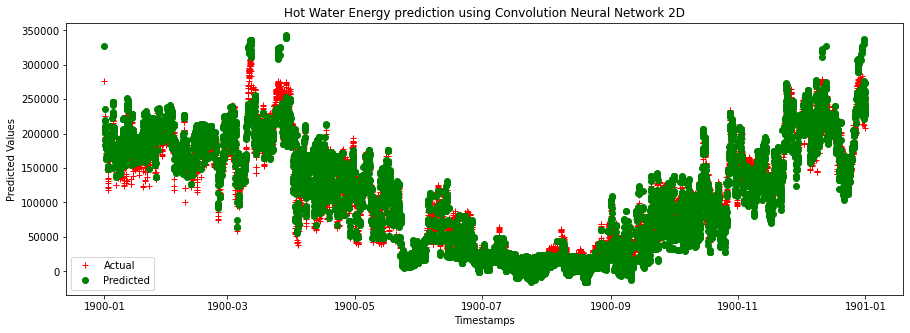

In [62]:
plt.figure(figsize = (15,5))
plt.plot(results_CNN2D['Timestamp'],results_CNN2D['Test_HWE'],'r+', label = 'Actual')
plt.plot(results_CNN2D['Timestamp'],results_CNN2D['Pred_HWE'],'go', label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Convolution Neural Network 2D')
plt.legend()
plt.show()

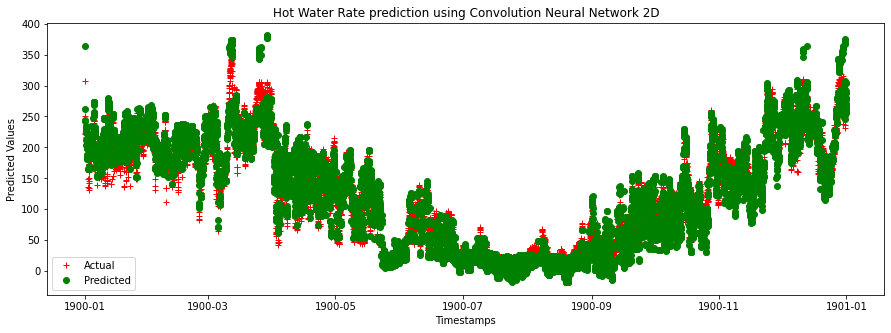

In [61]:
plt.figure(figsize = (15,5))
plt.plot(results_CNN2D['Timestamp'],results_CNN2D['Test_HWR'],'r+', label = 'Actual')
plt.plot(results_CNN2D['Timestamp'],results_CNN2D['Pred_HWR'],'go', label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Convolution Neural Network 2D')
plt.legend()
plt.show()

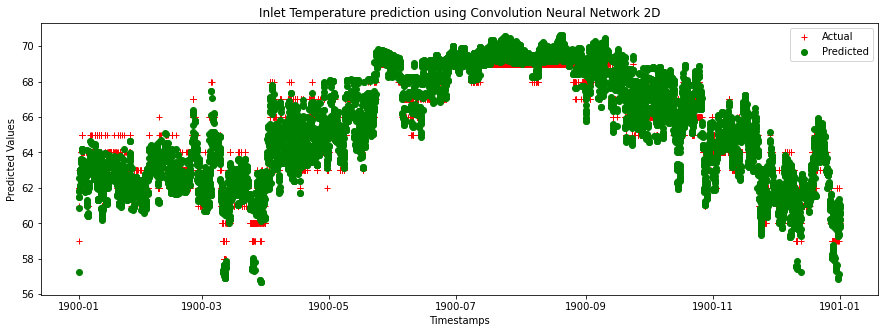

In [63]:
plt.figure(figsize = (15,5))
plt.plot(results_CNN2D['Timestamp'],results_CNN2D['Test_IT'],'r+', label = 'Actual')
plt.plot(results_CNN2D['Timestamp'],results_CNN2D['Pred_IT'],'go', label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Convolution Neural Network 2D')
plt.legend()
plt.show()

## Model 2: Recurrent Neural Network (RNN)

In [64]:
# Reshape the input data to a 3D tensor to work with SimpleRNN layer:
X_train_rnn = X_train_new.values.reshape(X_train_new.shape[0], 1, X_train_new.shape[1])
X_test_rnn = X_test_new.values.reshape(X_test_new.shape[0], 1, X_test_new.shape[1])

In [65]:
np.shape(X_train_rnn), np.shape(X_test_rnn)

((24528, 1, 3), (10512, 1, 3))

In [66]:
# define the model architecture:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(120, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences ='True', activation = 'linear', kernel_regularizer=l2(0.01)))
rnn_model.add(Dropout(0.5))
rnn_model.add(SimpleRNN(100,return_sequences='True',activation = 'linear', kernel_regularizer=l2(0.01)))
rnn_model.add(Dropout(0.5))
rnn_model.add(SimpleRNN(70, activation = 'linear', kernel_regularizer=l2(0.01)))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(3, activation='linear'))

In [185]:
# print the model summary:
print(rnn_model.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 1, 120)            14880     
                                                                 
 dropout_34 (Dropout)        (None, 1, 120)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 1, 100)            22100     
                                                                 
 dropout_35 (Dropout)        (None, 1, 100)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 70)                11970     
                                                                 
 dropout_36 (Dropout)        (None, 70)                0         
                                                                 
 dense_34 (Dense)            (None, 3)               

In [67]:
# compile the model:
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics = 'accuracy')

In [68]:
# Train the model:
history = rnn_model.fit(X_train_rnn, Y_train, epochs=100, batch_size=150, validation_split =0.2, verbose=1)

Epoch 1/100
131/131 [==============================] - 7s 17ms/step - loss: 1.9086 - accuracy: 0.6744 - val_loss: 1.1223 - val_accuracy: 0.8642
Epoch 2/100
131/131 [==============================] - 2s 12ms/step - loss: 0.9206 - accuracy: 0.7272 - val_loss: 0.5773 - val_accuracy: 0.5120
Epoch 3/100
131/131 [==============================] - 2s 12ms/step - loss: 0.4921 - accuracy: 0.7200 - val_loss: 0.3101 - val_accuracy: 0.9283
Epoch 4/100
131/131 [==============================] - 2s 12ms/step - loss: 0.2951 - accuracy: 0.7377 - val_loss: 0.2008 - val_accuracy: 0.4894
Epoch 5/100
131/131 [==============================] - 2s 12ms/step - loss: 0.2106 - accuracy: 0.7269 - val_loss: 0.1401 - val_accuracy: 0.5010
Epoch 6/100
131/131 [==============================] - 2s 12ms/step - loss: 0.1636 - accuracy: 0.7317 - val_loss: 0.1106 - val_accuracy: 0.7330
Epoch 7/100
131/131 [==============================] - 2s 12ms/step - loss: 0.1458 - accuracy: 0.7286 - val_loss: 0.0919 - val_accuracy:

131/131 [==============================] - 2s 12ms/step - loss: 0.1155 - accuracy: 0.7573 - val_loss: 0.0734 - val_accuracy: 0.4935
Epoch 58/100
131/131 [==============================] - 1s 11ms/step - loss: 0.1169 - accuracy: 0.7268 - val_loss: 0.0703 - val_accuracy: 0.8891
Epoch 59/100
131/131 [==============================] - 1s 11ms/step - loss: 0.1190 - accuracy: 0.7293 - val_loss: 0.0696 - val_accuracy: 0.5577
Epoch 60/100
131/131 [==============================] - 1s 11ms/step - loss: 0.1156 - accuracy: 0.7306 - val_loss: 0.0718 - val_accuracy: 0.9645
Epoch 61/100
131/131 [==============================] - 1s 11ms/step - loss: 0.1240 - accuracy: 0.7372 - val_loss: 0.0768 - val_accuracy: 0.9446
Epoch 62/100
131/131 [==============================] - 1s 11ms/step - loss: 0.1253 - accuracy: 0.7245 - val_loss: 0.0696 - val_accuracy: 0.4841
Epoch 63/100
131/131 [==============================] - 1s 11ms/step - loss: 0.1204 - accuracy: 0.7248 - val_loss: 0.0702 - val_accuracy: 0.974

In [69]:
# Evaluate the model:
accuracy = rnn_model.evaluate(X_test_rnn, Y_test)
print('Accuracy:', accuracy)

329/329 [==============================] - 1s 3ms/step - loss: 0.0795 - accuracy: 0.8916
Accuracy: [0.07949016988277435, 0.8916476368904114]


In [70]:
Y_Pred2 = rnn_model.predict(X_test_rnn)
Y_Pred2

329/329 [==============================] - 2s 3ms/step


array([[ 0.8475    ,  0.8474872 , -0.848619  ],
       [ 1.3125921 ,  1.312568  , -1.3146002 ],
       [-1.3878415 , -1.3877993 ,  1.3909988 ],
       ...,
       [ 0.54387087,  0.5438655 , -0.5444088 ],
       [-0.08699633, -0.0869861 ,  0.08766519],
       [ 1.9475987 ,  1.9475589 , -1.9508218 ]], dtype=float32)

In [71]:
Y_test2 = SY.inverse_transform(Y_test)
print(Y_test2)
Y_Pred2 = SY.inverse_transform(Y_Pred2)
print(Y_Pred2)

[[183529.1776        203.9213084      63.        ]
 [237293.2179        263.659131       61.        ]
 [ 19681.78792        21.86865325     69.        ]
 ...
 [175346.9726        194.8299696      63.        ]
 [113704.6458        126.3384954      66.        ]
 [258172.8899        286.8587666      60.        ]]
[[180764.86        200.84879      62.951653]
 [215373.16        239.30151      61.612568]
 [ 14429.277        16.036018     69.387634]
 ...
 [158171.3         175.74544      63.82586 ]
 [111227.39        123.58683      65.64225 ]
 [262625.1         291.80237      59.78426 ]]


In [72]:
Error = Y_test2 - Y_Pred2
print(Error)

[[ 2764.318225       3.072523       0.04834747]
 [21920.06165       24.35761733    -0.6125679 ]
 [ 5252.51057625     5.83263488    -0.38763428]
 ...
 [17175.675725      19.08453198    -0.82585907]
 [ 2477.255175       2.75166526     0.35774994]
 [-4452.20385       -4.94360156     0.2157402 ]]


In [73]:
results_RNN = pd.concat([pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp']),
                     pd.DataFrame(np.array(Y_test2[:,0]),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test2[:,1]),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test2[:,2]),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred2[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred2[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred2[:,2]),columns = ['Pred_IT'])], axis = 1)
results_RNN.index = X_test.index
results_RNN

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
5063,02/22 18:00:00,183529.17760,203.921308,63.0,180764.859375,200.848785,62.951653
35039,12/31 00:00:00,237293.21790,263.659131,61.0,215373.156250,239.301514,61.612568
22416,08/22 12:15:00,19681.78792,21.868653,69.0,14429.277344,16.036018,69.387634
13063,05/17 02:00:00,171645.43320,190.717148,63.0,187963.250000,208.846817,62.673130
32985,12/10 14:30:00,227977.02230,253.307803,61.0,215181.718750,239.088806,61.619972
...,...,...,...,...,...,...,...
18952,07/17 10:15:00,17167.66087,19.075179,69.0,-3241.034912,-3.597131,70.071342
34881,12/30 08:30:00,275660.79860,306.289776,59.0,402907.625000,447.667908,54.356350
11455,04/30 08:00:00,175346.97260,194.829970,63.0,158171.296875,175.745438,63.825859
13266,05/19 04:45:00,113704.64580,126.338495,66.0,111227.390625,123.586830,65.642250


In [74]:
results_RNN = results_RNN.sort_index(ascending =True)
results_RNN

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
3,01/01 01:00:00,276488.1718,307.209080,59.0,385368.062500,428.180023,55.035000
4,01/01 01:15:00,224995.4725,249.994970,61.0,215698.265625,239.662735,61.599983
6,01/01 01:45:00,200673.2760,222.970307,62.0,198600.390625,220.665527,62.261551
7,01/01 02:00:00,199227.9614,221.364402,62.0,197723.828125,219.691620,62.295464
17,01/01 04:30:00,194915.0642,216.572294,62.0,188958.484375,209.952560,62.634621
...,...,...,...,...,...,...,...
35028,12/31 21:15:00,243108.7011,270.120779,61.0,225061.812500,250.066422,61.237686
35032,12/31 22:15:00,241859.3820,268.732647,61.0,221555.687500,246.170792,61.373348
35035,12/31 23:00:00,238868.6237,265.409582,61.0,218926.062500,243.249084,61.475094
35036,12/31 23:15:00,239238.6102,265.820678,61.0,218037.843750,242.262192,61.509464


In [75]:
results_RNN['Timestamp'] = pd.to_datetime(results_RNN['Timestamp'], format='%m/%d %H:%M:%S')
results_RNN

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
3,1900-01-01 01:00:00,276488.1718,307.209080,59.0,385368.062500,428.180023,55.035000
4,1900-01-01 01:15:00,224995.4725,249.994970,61.0,215698.265625,239.662735,61.599983
6,1900-01-01 01:45:00,200673.2760,222.970307,62.0,198600.390625,220.665527,62.261551
7,1900-01-01 02:00:00,199227.9614,221.364402,62.0,197723.828125,219.691620,62.295464
17,1900-01-01 04:30:00,194915.0642,216.572294,62.0,188958.484375,209.952560,62.634621
...,...,...,...,...,...,...,...
35028,1900-12-31 21:15:00,243108.7011,270.120779,61.0,225061.812500,250.066422,61.237686
35032,1900-12-31 22:15:00,241859.3820,268.732647,61.0,221555.687500,246.170792,61.373348
35035,1900-12-31 23:00:00,238868.6237,265.409582,61.0,218926.062500,243.249084,61.475094
35036,1900-12-31 23:15:00,239238.6102,265.820678,61.0,218037.843750,242.262192,61.509464


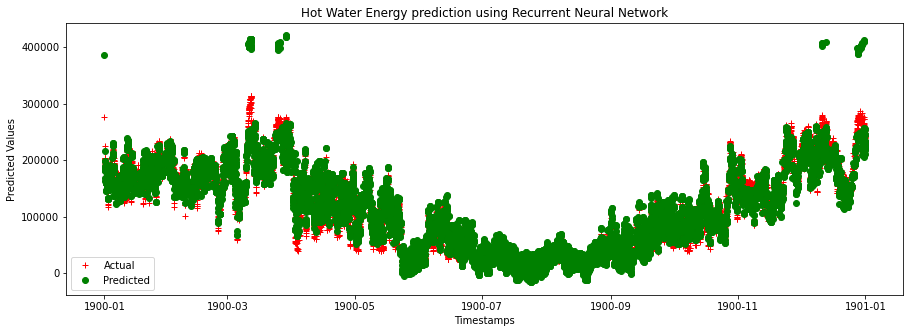

In [76]:
plt.figure(figsize = (15,5))
plt.plot(results_RNN['Timestamp'],results_RNN['Test_HWE'],'r+', label = 'Actual')
plt.plot(results_RNN['Timestamp'],results_RNN['Pred_HWE'],'go', label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Recurrent Neural Network')
plt.legend()
plt.show()

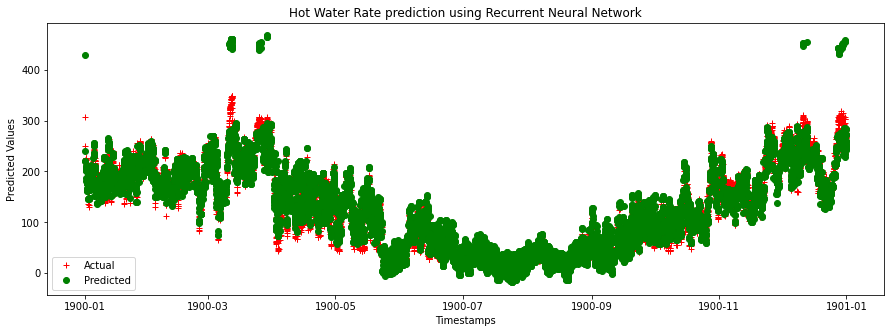

In [77]:
plt.figure(figsize = (15,5))
plt.plot(results_RNN['Timestamp'],results_RNN['Test_HWR'],'r+',label = 'Actual')
plt.plot(results_RNN['Timestamp'],results_RNN['Pred_HWR'],'go',label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Recurrent Neural Network')
plt.legend()
plt.show()

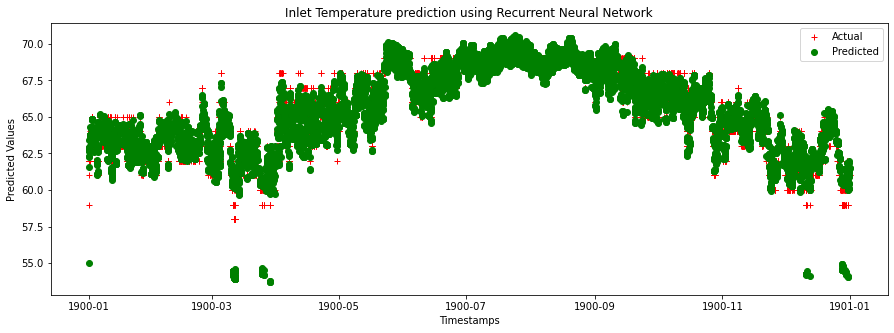

In [78]:
plt.figure(figsize = (15,5))
plt.plot(results_RNN['Timestamp'],results_RNN['Test_IT'],'r+',label = 'Actual')
plt.plot(results_RNN['Timestamp'],results_RNN['Pred_IT'],'go',label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Recurrent Neural Network')
plt.legend()
plt.show()

## Model 3: CNN + LSTM

In [79]:
# Reshape the data for the model:
X_train_cnnlstm = X_train_new.values.reshape((X_train_new.shape[0], X_train_new.shape[1], 1))
X_test_cnnlstm = X_test_new.values.reshape((X_test_new.shape[0], X_test_new.shape[1], 1))

In [80]:
np.shape(X_train_cnnlstm),np.shape(X_test_cnnlstm)

((24528, 3, 1), (10512, 3, 1))

In [81]:
# Define the model:
cnnlstm_model = Sequential()

# Add CNN layers
cnnlstm_model.add(Conv1D(filters=128, kernel_size=2, activation='linear', input_shape=(X_train_cnnlstm.shape[1],X_train_cnnlstm.shape[2])))
cnnlstm_model.add(MaxPooling1D(pool_size=2))
cnnlstm_model.add(Dropout(0.5))

# Add LSTM layers
cnnlstm_model.add(LSTM(128, activation='linear'))
cnnlstm_model.add(Dropout(0.5))

# Add Dense layer for output
cnnlstm_model.add(Dense(3))

In [82]:
# Compile the model:
cnnlstm_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [83]:
# Print model summary:
print(cnnlstm_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 128)            384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 128)           0         
 )                                                               
                                                                 
 dropout_5 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 3)                 387       
                                                      

In [84]:
# Train the model:
history = cnnlstm_model.fit(X_train_cnnlstm, Y_train, epochs=100, batch_size=150, validation_split = 0.2 , verbose = 1)

Epoch 1/100
131/131 [==============================] - 5s 19ms/step - loss: 0.1881 - accuracy: 0.7101 - val_loss: 0.0307 - val_accuracy: 0.6839
Epoch 2/100
131/131 [==============================] - 2s 16ms/step - loss: 0.0550 - accuracy: 0.7292 - val_loss: 0.0243 - val_accuracy: 0.5438
Epoch 3/100
131/131 [==============================] - 2s 16ms/step - loss: 0.0491 - accuracy: 0.7244 - val_loss: 0.0228 - val_accuracy: 0.8465
Epoch 4/100
131/131 [==============================] - 2s 16ms/step - loss: 0.0454 - accuracy: 0.7253 - val_loss: 0.0216 - val_accuracy: 0.6808
Epoch 5/100
131/131 [==============================] - 2s 16ms/step - loss: 0.0421 - accuracy: 0.7229 - val_loss: 0.0222 - val_accuracy: 0.5701
Epoch 6/100
131/131 [==============================] - 2s 16ms/step - loss: 0.0400 - accuracy: 0.7230 - val_loss: 0.0205 - val_accuracy: 0.5897
Epoch 7/100
131/131 [==============================] - 2s 16ms/step - loss: 0.0380 - accuracy: 0.7268 - val_loss: 0.0198 - val_accuracy:

131/131 [==============================] - 2s 15ms/step - loss: 0.0278 - accuracy: 0.7634 - val_loss: 0.0122 - val_accuracy: 0.7797
Epoch 58/100
131/131 [==============================] - 2s 15ms/step - loss: 0.0281 - accuracy: 0.7439 - val_loss: 0.0115 - val_accuracy: 0.8000
Epoch 59/100
131/131 [==============================] - 2s 15ms/step - loss: 0.0276 - accuracy: 0.7528 - val_loss: 0.0119 - val_accuracy: 0.7815
Epoch 60/100
131/131 [==============================] - 2s 15ms/step - loss: 0.0279 - accuracy: 0.7542 - val_loss: 0.0123 - val_accuracy: 0.7996
Epoch 61/100
131/131 [==============================] - 2s 15ms/step - loss: 0.0279 - accuracy: 0.7559 - val_loss: 0.0118 - val_accuracy: 0.7379
Epoch 62/100
131/131 [==============================] - 2s 15ms/step - loss: 0.0281 - accuracy: 0.7395 - val_loss: 0.0126 - val_accuracy: 0.8098
Epoch 63/100
131/131 [==============================] - 2s 15ms/step - loss: 0.0275 - accuracy: 0.7565 - val_loss: 0.0117 - val_accuracy: 0.777

In [85]:
# Evaluate the model:
accuracy = cnnlstm_model.evaluate(X_test_cnnlstm, Y_test)
accuracy

329/329 [==============================] - 1s 4ms/step - loss: 0.0116 - accuracy: 0.8816


[0.011565502732992172, 0.8815639019012451]

In [86]:
Y_Pred3 = cnnlstm_model.predict(X_test_cnnlstm)
Y_Pred3

329/329 [==============================] - 1s 3ms/step


array([[ 0.8783042 ,  0.8783042 , -0.87403095],
       [ 1.4160161 ,  1.4160161 , -1.4335201 ],
       [-1.2519726 , -1.2519726 ,  1.242429  ],
       ...,
       [ 0.2565183 ,  0.2565183 , -0.2544648 ],
       [-0.2221476 , -0.22214763,  0.2351678 ],
       [ 1.7433097 ,  1.7433096 , -1.7549176 ]], dtype=float32)

In [87]:
Y_test3 = SY.inverse_transform(Y_test)
print(Y_test3)
Y_Pred3 = SY.inverse_transform(Y_Pred3)
print(Y_Pred3)

[[183529.1776        203.9213084      63.        ]
 [237293.2179        263.659131       61.        ]
 [ 19681.78792        21.86865325     69.        ]
 ...
 [175346.9726        194.8299696      63.        ]
 [113704.6458        126.3384954      66.        ]
 [258172.8899        286.8587666      60.        ]]
[[183057.05        203.39673      62.878628]
 [223069.11        247.85457      61.27083 ]
 [ 24539.512        27.266129     68.960686]
 ...
 [136788.9         151.98767      64.65907 ]
 [101170.555       112.41172      66.066124]
 [247423.6         274.9151       60.34723 ]]


In [88]:
Error = Y_test3 - Y_Pred3
print(Error)

[[  472.130725       0.52457988     0.12137222]
 [14224.108525      15.80456252    -0.27082825]
 [-4857.72379875    -5.39747529     0.03931427]
 ...
 [38558.06635       42.8422987     -1.65907288]
 [12534.0911125     13.92677512    -0.06612396]
 [10749.29615       11.9436665     -0.347229  ]]


In [89]:
results_CNNLSTM = pd.concat([pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp']),
                     pd.DataFrame(np.array(Y_test3[:,0]),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test3[:,1]),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test3[:,2]),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred3[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred3[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred3[:,2]),columns = ['Pred_IT'])], axis = 1)
results_CNNLSTM.index = X_test.index
results_CNNLSTM

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
5063,02/22 18:00:00,183529.17760,203.921308,63.0,183057.046875,203.396729,62.878628
35039,12/31 00:00:00,237293.21790,263.659131,61.0,223069.109375,247.854568,61.270828
22416,08/22 12:15:00,19681.78792,21.868653,69.0,24539.511719,27.266129,68.960686
13063,05/17 02:00:00,171645.43320,190.717148,63.0,191482.343750,212.758163,62.519089
32985,12/10 14:30:00,227977.02230,253.307803,61.0,224128.718750,249.031906,61.220940
...,...,...,...,...,...,...,...
18952,07/17 10:15:00,17167.66087,19.075179,69.0,23222.550781,25.802841,68.951088
34881,12/30 08:30:00,275660.79860,306.289776,59.0,263111.000000,292.345551,59.674652
11455,04/30 08:00:00,175346.97260,194.829970,63.0,136788.906250,151.987671,64.659073
13266,05/19 04:45:00,113704.64580,126.338495,66.0,101170.554688,112.411720,66.066124


In [90]:
results_CNNLSTM = results_CNNLSTM.sort_index(ascending =True)
results_CNNLSTM

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
3,01/01 01:00:00,276488.1718,307.209080,59.0,306049.625000,340.055145,58.154831
4,01/01 01:15:00,224995.4725,249.994970,61.0,206930.265625,229.922516,61.933674
6,01/01 01:45:00,200673.2760,222.970307,62.0,195835.796875,217.595337,62.389336
7,01/01 02:00:00,199227.9614,221.364402,62.0,195033.375000,216.703751,62.417412
17,01/01 04:30:00,194915.0642,216.572294,62.0,188036.046875,208.928940,62.662037
...,...,...,...,...,...,...,...
35028,12/31 21:15:00,243108.7011,270.120779,61.0,227181.265625,252.423630,61.171772
35032,12/31 22:15:00,241859.3820,268.732647,61.0,225867.031250,250.963364,61.197483
35035,12/31 23:00:00,238868.6237,265.409582,61.0,224729.000000,249.698898,61.225269
35036,12/31 23:15:00,239238.6102,265.820678,61.0,224324.421875,249.249359,61.235916


In [91]:
results_CNNLSTM['Timestamp'] = pd.to_datetime(results_CNNLSTM['Timestamp'], format='%m/%d %H:%M:%S')
results_CNNLSTM

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
3,1900-01-01 01:00:00,276488.1718,307.209080,59.0,306049.625000,340.055145,58.154831
4,1900-01-01 01:15:00,224995.4725,249.994970,61.0,206930.265625,229.922516,61.933674
6,1900-01-01 01:45:00,200673.2760,222.970307,62.0,195835.796875,217.595337,62.389336
7,1900-01-01 02:00:00,199227.9614,221.364402,62.0,195033.375000,216.703751,62.417412
17,1900-01-01 04:30:00,194915.0642,216.572294,62.0,188036.046875,208.928940,62.662037
...,...,...,...,...,...,...,...
35028,1900-12-31 21:15:00,243108.7011,270.120779,61.0,227181.265625,252.423630,61.171772
35032,1900-12-31 22:15:00,241859.3820,268.732647,61.0,225867.031250,250.963364,61.197483
35035,1900-12-31 23:00:00,238868.6237,265.409582,61.0,224729.000000,249.698898,61.225269
35036,1900-12-31 23:15:00,239238.6102,265.820678,61.0,224324.421875,249.249359,61.235916


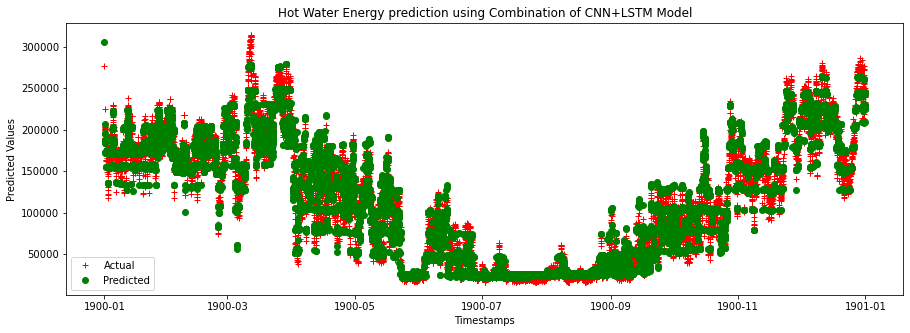

In [92]:
plt.figure(figsize = (15,5))
plt.plot(results_CNNLSTM['Timestamp'],results_CNNLSTM['Test_HWE'],'r+',label = 'Actual')
plt.plot(results_CNNLSTM['Timestamp'],results_CNNLSTM['Pred_HWE'],'go',label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Combination of CNN+LSTM Model')
plt.legend()
plt.show()

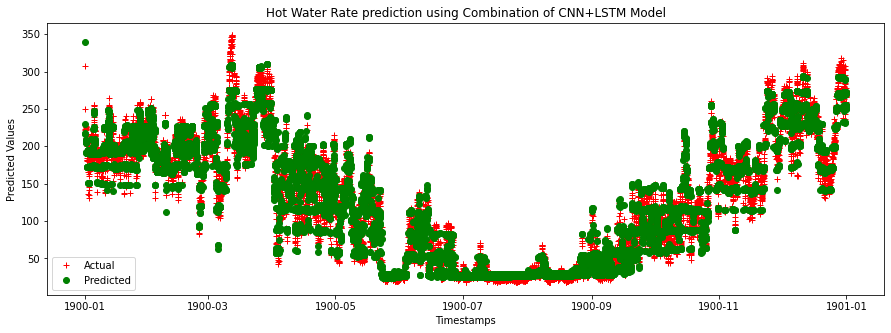

In [93]:
plt.figure(figsize = (15,5))
plt.plot(results_CNNLSTM['Timestamp'],results_CNNLSTM['Test_HWR'],'r+',label = 'Actual')
plt.plot(results_CNNLSTM['Timestamp'],results_CNNLSTM['Pred_HWR'],'go',label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Combination of CNN+LSTM Model')
plt.legend()
plt.show()

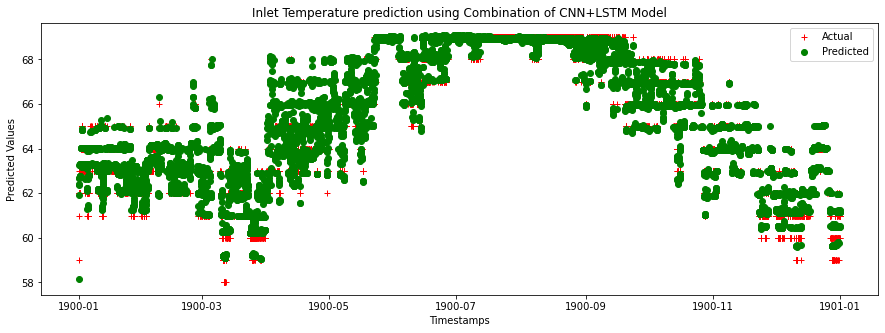

In [94]:
plt.figure(figsize = (15,5))
plt.plot(results_CNNLSTM['Timestamp'],results_CNNLSTM['Test_IT'],'r+',label = 'Actual')
plt.plot(results_CNNLSTM['Timestamp'],results_CNNLSTM['Pred_IT'],'go',label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Combination of CNN+LSTM Model')
plt.legend()
plt.show()

## Model 4: Parallel Convolution Neural Network (1D)

In [95]:
# Reshape the data for the model:
X_train_cnn1dp = X_train_new.values.reshape((X_train_new.shape[0], X_train_new.shape[1], 1))
X_test_cnn1dp = X_test_new.values.reshape((X_test_new.shape[0], X_test_new.shape[1], 1))

In [96]:
# Define the model architecture:
cnn1dp_model = Sequential()
cnn1dp_model.add(Conv1D(filters=128, kernel_size=2, activation='linear', input_shape=(X_train_cnn1dp.shape[1], X_train_cnn1dp.shape[2]),padding = 'same'))
cnn1dp_model.add(MaxPooling1D(pool_size=2,padding = 'same'))
cnn1dp_model.add(Dropout(0.5))
cnn1dp_model.add(Conv1D(filters=64, kernel_size=2, activation='linear',padding = 'same'))
cnn1dp_model.add(MaxPooling1D(pool_size=2,padding = 'same'))
cnn1dp_model.add(Dropout(0.5))
cnn1dp_model.add(Flatten())
cnn1dp_model.add(Dense(128, activation='linear'))
cnn1dp_model.add(Dense(64, activation='linear'))
cnn1dp_model.add(Dense(3))

In [97]:
# Print model summary:
cnn1dp_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 3, 128)            384       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 128)           0         
 1D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 2, 128)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 2, 64)             16448     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 1, 64)            

In [98]:
# Compile the model:
cnn1dp_model.compile(optimizer='adam', loss='mse', metrics='accuracy')

In [99]:
# Train the model:
history = cnn1dp_model.fit(X_train_cnn1dp, Y_train, epochs=100, batch_size=150, validation_split = 0.2, verbose=1)

Epoch 1/100
131/131 [==============================] - 3s 14ms/step - loss: 0.1188 - accuracy: 0.7360 - val_loss: 0.0166 - val_accuracy: 0.9872
Epoch 2/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0576 - accuracy: 0.7399 - val_loss: 0.0122 - val_accuracy: 0.9943
Epoch 3/100
131/131 [==============================] - 2s 13ms/step - loss: 0.0477 - accuracy: 0.7546 - val_loss: 0.0130 - val_accuracy: 0.4965
Epoch 4/100
131/131 [==============================] - 2s 15ms/step - loss: 0.0424 - accuracy: 0.7365 - val_loss: 0.0084 - val_accuracy: 0.4965
Epoch 5/100
131/131 [==============================] - 3s 20ms/step - loss: 0.0413 - accuracy: 0.7451 - val_loss: 0.0098 - val_accuracy: 0.4965
Epoch 6/100
131/131 [==============================] - 2s 18ms/step - loss: 0.0401 - accuracy: 0.7292 - val_loss: 0.0077 - val_accuracy: 0.4978
Epoch 7/100
131/131 [==============================] - 2s 13ms/step - loss: 0.0391 - accuracy: 0.7438 - val_loss: 0.0076 - val_accuracy:

131/131 [==============================] - 2s 12ms/step - loss: 0.0332 - accuracy: 0.7434 - val_loss: 0.0083 - val_accuracy: 0.9910
Epoch 58/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0315 - accuracy: 0.7381 - val_loss: 0.0085 - val_accuracy: 0.6166
Epoch 59/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0319 - accuracy: 0.7431 - val_loss: 0.0070 - val_accuracy: 0.9943
Epoch 60/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0316 - accuracy: 0.7461 - val_loss: 0.0067 - val_accuracy: 0.8700
Epoch 61/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0327 - accuracy: 0.7512 - val_loss: 0.0068 - val_accuracy: 0.4965
Epoch 62/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0322 - accuracy: 0.7565 - val_loss: 0.0074 - val_accuracy: 0.5530
Epoch 63/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0314 - accuracy: 0.7420 - val_loss: 0.0063 - val_accuracy: 0.507

In [101]:
# Evaluate the model:
accuracy = cnn1dp_model.evaluate(X_test_cnn1dp, Y_test)
print('Accuracy:', accuracy)

329/329 [==============================] - 1s 3ms/step - loss: 0.0071 - accuracy: 0.5734
Accuracy: [0.007146132178604603, 0.57343989610672]


In [102]:
Y_Pred4 = cnn1dp_model.predict(X_test_cnn1dp)
Y_Pred4

329/329 [==============================] - 1s 3ms/step


array([[ 0.85337216,  0.8585323 , -0.8521337 ],
       [ 1.4659549 ,  1.478978  , -1.4712389 ],
       [-1.240872  , -1.2594924 ,  1.2464491 ],
       ...,
       [ 0.7320497 ,  0.73507535, -0.7309379 ],
       [-0.17785436, -0.18378499,  0.18702038],
       [ 1.8229797 ,  1.8415413 , -1.8361828 ]], dtype=float32)

In [103]:
Y_test4 = SY.inverse_transform(Y_test)
print(Y_test4)
Y_Pred4 = SY.inverse_transform(Y_Pred4)
print(Y_Pred4)

[[183529.1776        203.9213084      63.        ]
 [237293.2179        263.659131       61.        ]
 [ 19681.78792        21.86865325     69.        ]
 ...
 [175346.9726        194.8299696      63.        ]
 [113704.6458        126.3384954      66.        ]
 [258172.8899        286.8587666      60.        ]]
[[181201.81        201.762        62.941555]
 [226785.14        253.06024      61.162434]
 [ 25365.52         26.644386     68.97224 ]
 ...
 [172174.          191.55461      63.289833]
 [104466.484       115.583534     65.927765]
 [253351.98        283.03687      60.113697]]


In [104]:
Error = Y_test4 - Y_Pred4
print(Error)

[[ 2327.3651         2.15931499     0.05844498]
 [10508.077275      10.5988893     -0.16243362]
 [-5683.73161125    -4.77573304     0.02776337]
 ...
 [ 3172.9726         3.27535839    -0.28983307]
 [ 9238.161425      10.75496116     0.07223511]
 [ 4820.905525       3.82190137    -0.11369705]]


In [105]:
results_CNN1D = pd.concat([pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp']),
                     pd.DataFrame(np.array(Y_test4[:,0]),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test4[:,1]),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test4[:,2]),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred4[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred4[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred4[:,2]),columns = ['Pred_IT'])], axis = 1)
results_CNN1D.index = X_test.index
results_CNN1D


,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
5063,02/22 18:00:00,183529.17760,203.921308,63.0,181201.812500,201.761993,62.941555
35039,12/31 00:00:00,237293.21790,263.659131,61.0,226785.140625,253.060242,61.162434
22416,08/22 12:15:00,19681.78792,21.868653,69.0,25365.519531,26.644386,68.972237
13063,05/17 02:00:00,171645.43320,190.717148,63.0,183865.796875,204.807709,62.840183
32985,12/10 14:30:00,227977.02230,253.307803,61.0,226219.796875,252.414764,61.183704
...,...,...,...,...,...,...,...
18952,07/17 10:15:00,17167.66087,19.075179,69.0,21611.238281,22.474533,69.112030
34881,12/30 08:30:00,275660.79860,306.289776,59.0,286973.406250,320.803925,58.686523
11455,04/30 08:00:00,175346.97260,194.829970,63.0,172174.000000,191.554611,63.289833
13266,05/19 04:45:00,113704.64580,126.338495,66.0,104466.484375,115.583534,65.927765


In [106]:
results_CNN1D = results_CNN1D.sort_index(ascending =True)
results_CNN1D

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
3,01/01 01:00:00,276488.1718,307.209080,59.0,311210.031250,348.144379,57.744511
4,01/01 01:15:00,224995.4725,249.994970,61.0,223760.687500,249.588821,61.271030
6,01/01 01:45:00,200673.2760,222.970307,62.0,205426.140625,228.950439,61.992210
7,01/01 02:00:00,199227.9614,221.364402,62.0,205124.781250,228.610489,62.004009
17,01/01 04:30:00,194915.0642,216.572294,62.0,202196.250000,225.317230,62.118069
...,...,...,...,...,...,...,...
35028,12/31 21:15:00,243108.7011,270.120779,61.0,231361.250000,258.248505,60.985439
35032,12/31 22:15:00,241859.3820,268.732647,61.0,229787.015625,256.464233,61.046268
35035,12/31 23:00:00,238868.6237,265.409582,61.0,228592.109375,255.109344,61.092457
35036,12/31 23:15:00,239238.6102,265.820678,61.0,228171.937500,254.632812,61.108711


In [107]:
results_CNN1D['Timestamp'] = pd.to_datetime(results_CNN1D['Timestamp'], format='%m/%d %H:%M:%S')
results_CNN1D

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
3,1900-01-01 01:00:00,276488.1718,307.209080,59.0,311210.031250,348.144379,57.744511
4,1900-01-01 01:15:00,224995.4725,249.994970,61.0,223760.687500,249.588821,61.271030
6,1900-01-01 01:45:00,200673.2760,222.970307,62.0,205426.140625,228.950439,61.992210
7,1900-01-01 02:00:00,199227.9614,221.364402,62.0,205124.781250,228.610489,62.004009
17,1900-01-01 04:30:00,194915.0642,216.572294,62.0,202196.250000,225.317230,62.118069
...,...,...,...,...,...,...,...
35028,1900-12-31 21:15:00,243108.7011,270.120779,61.0,231361.250000,258.248505,60.985439
35032,1900-12-31 22:15:00,241859.3820,268.732647,61.0,229787.015625,256.464233,61.046268
35035,1900-12-31 23:00:00,238868.6237,265.409582,61.0,228592.109375,255.109344,61.092457
35036,1900-12-31 23:15:00,239238.6102,265.820678,61.0,228171.937500,254.632812,61.108711


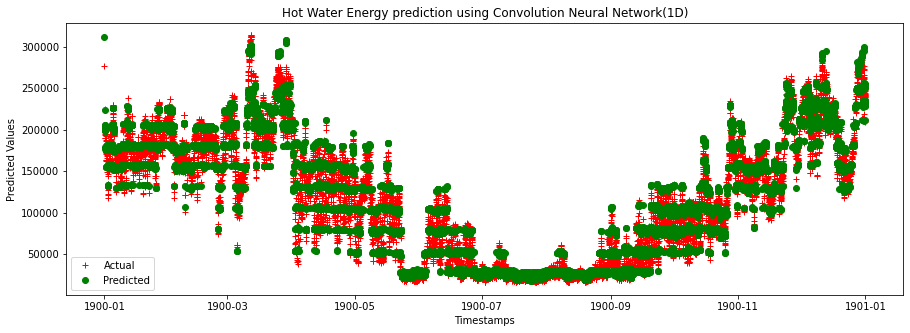

In [108]:
plt.figure(figsize = (15,5))
plt.plot(results_CNN1D['Timestamp'],results_CNN1D['Test_HWE'],'r+',label = 'Actual')
plt.plot(results_CNN1D['Timestamp'],results_CNN1D['Pred_HWE'],'go',label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Convolution Neural Network(1D)')
plt.legend()
plt.show()

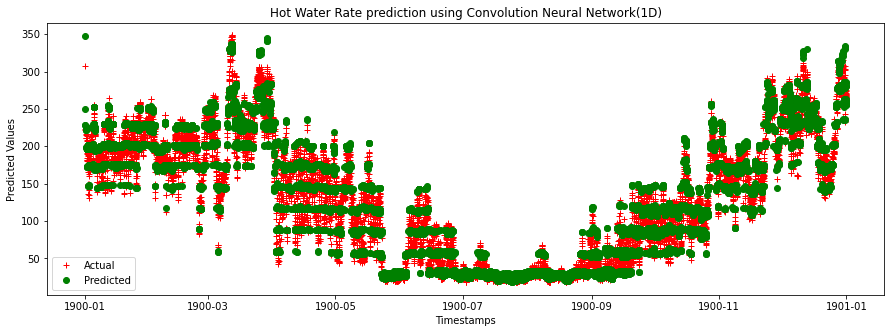

In [109]:
plt.figure(figsize = (15,5))
plt.plot(results_CNN1D['Timestamp'],results_CNN1D['Test_HWR'],'r+',label = 'Actual')
plt.plot(results_CNN1D['Timestamp'],results_CNN1D['Pred_HWR'],'go',label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Convolution Neural Network(1D)')
plt.legend()
plt.show()

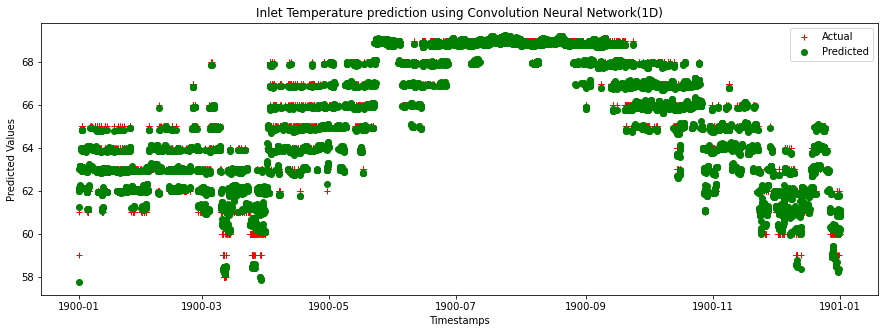

In [110]:
plt.figure(figsize = (15,5))
plt.plot(results_CNN1D['Timestamp'],results_CNN1D['Test_IT'],'r+',label = 'Actual')
plt.plot(results_CNN1D['Timestamp'],results_CNN1D['Pred_IT'],'go',label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Convolution Neural Network(1D)')
plt.legend()
plt.show()

## Model 5: ANN having 4 hidden layers:

In [111]:
# Define the architecture of the ANN model:
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train_new.shape[1], activation='linear'))
ann_model.add(Dense(100, activation='linear'))
ann_model.add(Dense(200, activation='linear'))
ann_model.add(Dense(300, activation='linear'))
ann_model.add(Dense(3, activation='linear'))

In [112]:
# Print model summary:
ann_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                256       
                                                                 
 dense_11 (Dense)            (None, 100)               6500      
                                                                 
 dense_12 (Dense)            (None, 200)               20200     
                                                                 
 dense_13 (Dense)            (None, 300)               60300     
                                                                 
 dense_14 (Dense)            (None, 3)                 903       
                                                                 
Total params: 88,159
Trainable params: 88,159
Non-trainable params: 0
_________________________________________________________________


In [113]:
# Compile the model:
ann_model.compile(loss='mse', optimizer='adam', metrics = 'accuracy')

In [114]:
# Train the model:
history = ann_model.fit(X_train_new, Y_train, epochs=100, batch_size=150,validation_split = 0.2, verbose=1)

Epoch 1/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0782 - accuracy: 0.7248 - val_loss: 0.0669 - val_accuracy: 0.8471
Epoch 2/100
131/131 [==============================] - 1s 10ms/step - loss: 0.0615 - accuracy: 0.7301 - val_loss: 0.0505 - val_accuracy: 0.5459
Epoch 3/100
131/131 [==============================] - 1s 10ms/step - loss: 0.0595 - accuracy: 0.7286 - val_loss: 0.0615 - val_accuracy: 0.5644
Epoch 4/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0614 - accuracy: 0.7288 - val_loss: 0.0566 - val_accuracy: 0.6504
Epoch 5/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0594 - accuracy: 0.7393 - val_loss: 0.0495 - val_accuracy: 0.5565
Epoch 6/100
131/131 [==============================] - 1s 10ms/step - loss: 0.0598 - accuracy: 0.7266 - val_loss: 0.0487 - val_accuracy: 0.8027
Epoch 7/100
131/131 [==============================] - 1s 10ms/step - loss: 0.0589 - accuracy: 0.7197 - val_loss: 0.0509 - val_accuracy:

131/131 [==============================] - 1s 10ms/step - loss: 0.0581 - accuracy: 0.7361 - val_loss: 0.0485 - val_accuracy: 0.4902
Epoch 58/100
131/131 [==============================] - 1s 9ms/step - loss: 0.0591 - accuracy: 0.7185 - val_loss: 0.0562 - val_accuracy: 0.9749
Epoch 59/100
131/131 [==============================] - 1s 9ms/step - loss: 0.0582 - accuracy: 0.7418 - val_loss: 0.0523 - val_accuracy: 0.9662
Epoch 60/100
131/131 [==============================] - 1s 9ms/step - loss: 0.0587 - accuracy: 0.7420 - val_loss: 0.0490 - val_accuracy: 0.9706
Epoch 61/100
131/131 [==============================] - 1s 9ms/step - loss: 0.0586 - accuracy: 0.7281 - val_loss: 0.0492 - val_accuracy: 0.6892
Epoch 62/100
131/131 [==============================] - 1s 9ms/step - loss: 0.0579 - accuracy: 0.7384 - val_loss: 0.0483 - val_accuracy: 0.9490
Epoch 63/100
131/131 [==============================] - 1s 9ms/step - loss: 0.0579 - accuracy: 0.7332 - val_loss: 0.0488 - val_accuracy: 0.9808
Epoc

In [115]:
# Evaluate the model:
accuracy = ann_model.evaluate(X_test_new, Y_test)
print('Accuracy:', accuracy)

329/329 [==============================] - 1s 3ms/step - loss: 0.0579 - accuracy: 0.8642
Accuracy: [0.057880546897649765, 0.8641552329063416]


In [116]:
Y_Pred5 = ann_model.predict(X_test_new)
Y_Pred5

329/329 [==============================] - 1s 3ms/step


array([[ 0.78793126,  0.78703827, -0.7872665 ],
       [ 1.2349489 ,  1.2339107 , -1.220659  ],
       [-1.3359302 , -1.3466243 ,  1.3033059 ],
       ...,
       [ 0.4993004 ,  0.49718094, -0.5282158 ],
       [-0.09927811, -0.10458997,  0.10452017],
       [ 1.8352329 ,  1.8382686 , -1.8078605 ]], dtype=float32)

In [117]:
Y_test5 = SY.inverse_transform(Y_test)
print(Y_test5)
Y_Pred5 = SY.inverse_transform(Y_Pred5)
print(Y_Pred5)

[[183529.1776        203.9213084      63.        ]
 [237293.2179        263.659131       61.        ]
 [ 19681.78792        21.86865325     69.        ]
 ...
 [175346.9726        194.8299696      63.        ]
 [113704.6458        126.3384954      66.        ]
 [258172.8899        286.8587666      60.        ]]
[[176332.25        195.85089      63.12796 ]
 [209595.6         232.79816      61.882523]
 [ 18292.082        19.440353     69.13563 ]
 ...
 [154854.73        171.88557      63.872395]
 [110313.48        122.13135      65.69068 ]
 [254263.75        282.76627      60.195087]]


In [118]:
Error = Y_test5 - Y_Pred5
print(Error)

[[ 7196.9276         8.07041729    -0.12796021]
 [27697.62415       30.86097426    -0.88252258]
 [ 1389.70588875     2.42829986    -0.13562775]
 ...
 [20492.238225      22.94439526    -0.87239456]
 [ 3391.1692375      4.20714774     0.30931854]
 [ 3909.1399         4.09250073    -0.19508743]]


In [119]:
results_ANN = pd.concat([pd.DataFrame(np.array(X_test['Date/Time']),columns = ['Timestamp']),
                     pd.DataFrame(np.array(Y_test5[:,0]),columns = ['Test_HWE']), 
                     pd.DataFrame(np.array(Y_test5[:,1]),columns = ['Test_HWR']),
                     pd.DataFrame(np.array(Y_test5[:,2]),columns = ['Test_IT']),
                     pd.DataFrame(np.array(Y_Pred5[:,0]),columns = ['Pred_HWE']),
                     pd.DataFrame(np.array(Y_Pred5[:,1]),columns = ['Pred_HWR']),
                     pd.DataFrame(np.array(Y_Pred5[:,2]),columns = ['Pred_IT'])], axis = 1)
results_ANN.index = X_test.index
results_ANN

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
5063,02/22 18:00:00,183529.17760,203.921308,63.0,176332.250000,195.850891,63.127960
35039,12/31 00:00:00,237293.21790,263.659131,61.0,209595.593750,232.798157,61.882523
22416,08/22 12:15:00,19681.78792,21.868653,69.0,18292.082031,19.440353,69.135628
13063,05/17 02:00:00,171645.43320,190.717148,63.0,183306.437500,203.568924,62.914497
32985,12/10 14:30:00,227977.02230,253.307803,61.0,209386.000000,232.577744,61.883850
...,...,...,...,...,...,...,...
18952,07/17 10:15:00,17167.66087,19.075179,69.0,1383.902588,0.627616,69.697845
34881,12/30 08:30:00,275660.79860,306.289776,59.0,387701.218750,431.661682,54.733437
11455,04/30 08:00:00,175346.97260,194.829970,63.0,154854.734375,171.885574,63.872395
13266,05/19 04:45:00,113704.64580,126.338495,66.0,110313.476562,122.131348,65.690681


In [120]:
results_ANN = results_ANN.sort_index(ascending =True)
results_ANN

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
3,01/01 01:00:00,276488.1718,307.209080,59.0,370506.656250,412.729492,55.217209
4,01/01 01:15:00,224995.4725,249.994970,61.0,209447.281250,232.855499,61.789249
6,01/01 01:45:00,200673.2760,222.970307,62.0,193208.625000,214.724426,62.440727
7,01/01 02:00:00,199227.9614,221.364402,62.0,192372.187500,213.792694,62.469025
17,01/01 04:30:00,194915.0642,216.572294,62.0,184007.453125,204.474762,62.751999
...,...,...,...,...,...,...,...
35028,12/31 21:15:00,243108.7011,270.120779,61.0,218841.375000,243.097488,61.569744
35032,12/31 22:15:00,241859.3820,268.732647,61.0,215495.453125,239.370331,61.682934
35035,12/31 23:00:00,238868.6237,265.409582,61.0,212986.078125,236.574982,61.767826
35036,12/31 23:15:00,239238.6102,265.820678,61.0,212138.468750,235.630798,61.796501


In [121]:
results_ANN['Timestamp'] = pd.to_datetime(results_ANN['Timestamp'], format='%m/%d %H:%M:%S')
results_ANN

,Timestamp,Test_HWE,Test_HWR,Test_IT,Pred_HWE,Pred_HWR,Pred_IT
3,1900-01-01 01:00:00,276488.1718,307.209080,59.0,370506.656250,412.729492,55.217209
4,1900-01-01 01:15:00,224995.4725,249.994970,61.0,209447.281250,232.855499,61.789249
6,1900-01-01 01:45:00,200673.2760,222.970307,62.0,193208.625000,214.724426,62.440727
7,1900-01-01 02:00:00,199227.9614,221.364402,62.0,192372.187500,213.792694,62.469025
17,1900-01-01 04:30:00,194915.0642,216.572294,62.0,184007.453125,204.474762,62.751999
...,...,...,...,...,...,...,...
35028,1900-12-31 21:15:00,243108.7011,270.120779,61.0,218841.375000,243.097488,61.569744
35032,1900-12-31 22:15:00,241859.3820,268.732647,61.0,215495.453125,239.370331,61.682934
35035,1900-12-31 23:00:00,238868.6237,265.409582,61.0,212986.078125,236.574982,61.767826
35036,1900-12-31 23:15:00,239238.6102,265.820678,61.0,212138.468750,235.630798,61.796501


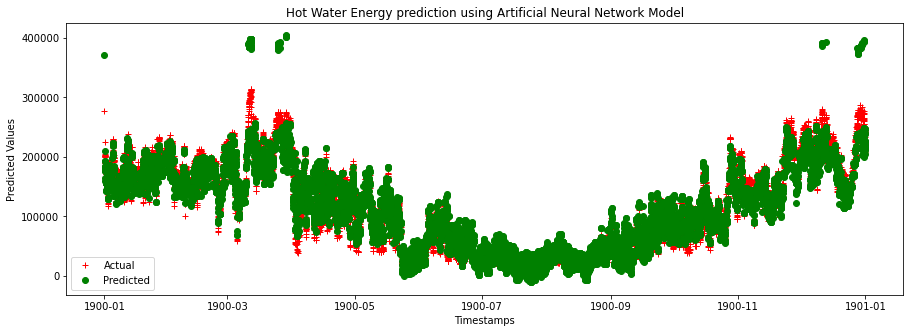

In [122]:
plt.figure(figsize = (15,5))
plt.plot(results_ANN['Timestamp'],results_ANN['Test_HWE'],'r+',label = 'Actual')
plt.plot(results_ANN['Timestamp'],results_ANN['Pred_HWE'],'go',label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Energy prediction using Artificial Neural Network Model')
plt.legend()
plt.show()

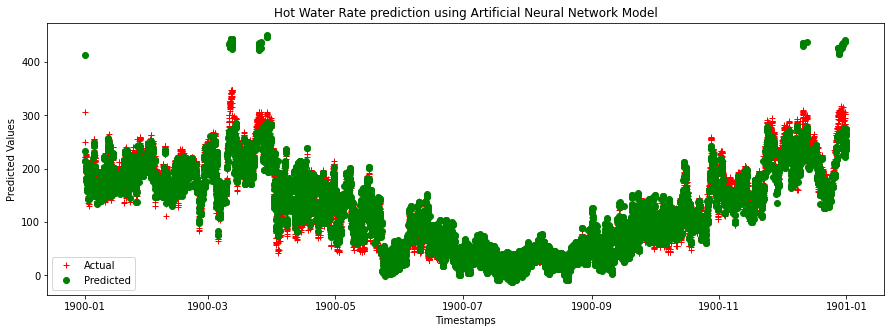

In [123]:
plt.figure(figsize = (15,5))
plt.plot(results_ANN['Timestamp'],results_ANN['Test_HWR'],'r+',label = 'Actual')
plt.plot(results_ANN['Timestamp'],results_ANN['Pred_HWR'],'go',label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Hot Water Rate prediction using Artificial Neural Network Model')
plt.legend()
plt.show()

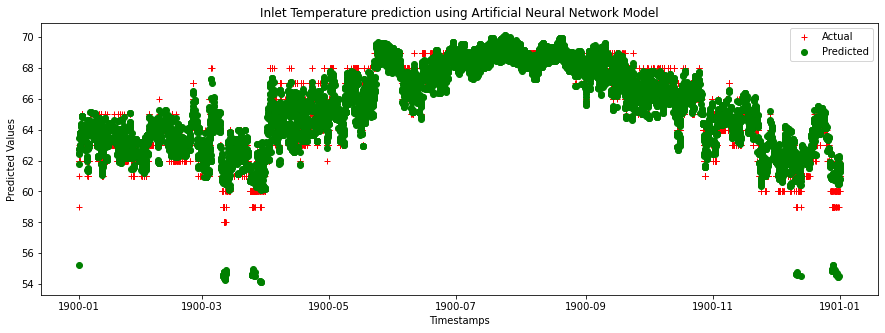

In [124]:
plt.figure(figsize = (15,5))
plt.plot(results_ANN['Timestamp'],results_ANN['Test_IT'],'r+',label = 'Actual')
plt.plot(results_ANN['Timestamp'],results_ANN['Pred_IT'],'go',label = 'Predicted')
plt.xlabel('Timestamps')
plt.ylabel('Predicted Values')
plt.title('Inlet Temperature prediction using Artificial Neural Network Model')
plt.legend()
plt.show()